### Nome: Ruan Luiz Molgero Lopes
### Matrícula: 20100866
### Disciplina: EEL7513 - Aprendizado de Máquina
### Trabalho 1

# 0 - Imports de Bibliotecas Necessárias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# 1 - Carregamento dos dados e EDA inicial

Nessa etapa, será carregado o dataset, observado possíveis problemas dele
e informações gerais a respeito dos dados.

1. Baixe os dados a partir do Kaggle e carregue-os no notebook
2. Mostre se existem dados faltantes no dataset
3. Mostre se existem dados duplicados no dataset
4. Mostre informações gerais sobre o dataset utilizando o df.info
5. Plote histogramas das colunas numéricas
6. Mostre a distribuição das variáveis binárias
7. Comente a respeito do que foi encontrado nessa etapa do trabalho. Existe algum dado que aparente ter inconsistências ou problemas? Discorra a respeito.

### 1.1. Baixe os dados a partir do Kaggle e carregue-os no notebook

In [2]:
df = pd.read_csv('./data/cars.csv')
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### 1.2. Mostre se existem dados faltantes no dataset

In [3]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [4]:
df.columns[df.isnull().any()]

Index(['engine_capacity'], dtype='object')

### 1.3. Mostre se existem dados duplicados no dataset

In [5]:
df.duplicated().sum()

40

### 1.4. Mostre informações gerais sobre o dataset utilizando o df.info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

### 1.5. Plote histogramas das colunas numéricas

Número de colunas númericas: 7


array([[<Axes: title={'center': 'odometer_value'}>,
        <Axes: title={'center': 'year_produced'}>,
        <Axes: title={'center': 'engine_capacity'}>],
       [<Axes: title={'center': 'price_usd'}>,
        <Axes: title={'center': 'number_of_photos'}>,
        <Axes: title={'center': 'up_counter'}>],
       [<Axes: title={'center': 'duration_listed'}>, <Axes: >, <Axes: >]],
      dtype=object)

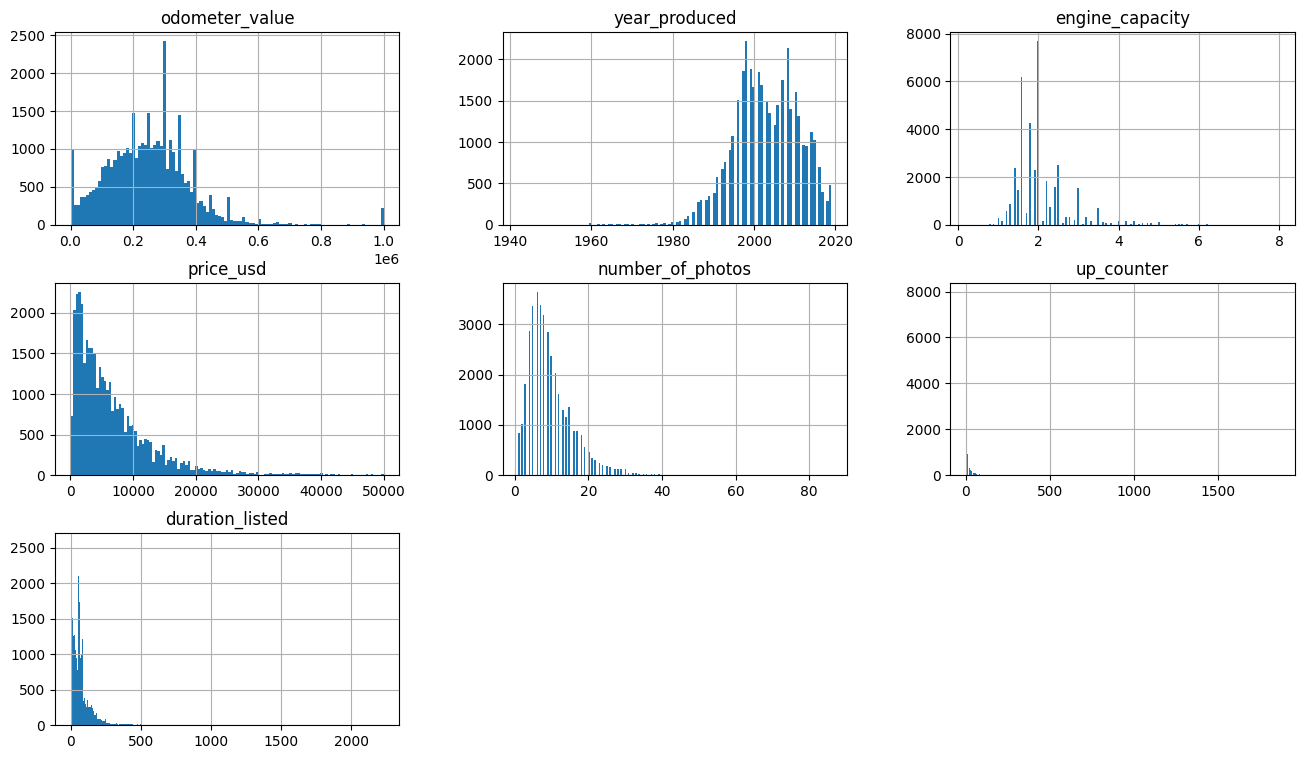

In [7]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f'Número de colunas númericas: {len(numeric_columns)}')

df.hist(bins='auto', figsize=(16,9), layout=(3,3))

### 1.6. Mostre a distribuição das variáveis binárias

In [8]:
# binary_columns = [col for col in df.columns if df[col].nunique() == 2]
bool_columns = df.select_dtypes(include='bool')
print(f'Número de colunas binárias: {len(bool_columns)}\n')

for col in bool_columns:
    # print(f'Distribuição de \"{col}\":')
    print(df[col].value_counts(normalize=True) * 100)
    print()

Número de colunas binárias: 38531

engine_has_gas
False    96.504114
True      3.495886
Name: proportion, dtype: float64

has_warranty
False    98.834705
True      1.165295
Name: proportion, dtype: float64

is_exchangeable
False    64.740079
True     35.259921
Name: proportion, dtype: float64

feature_0
False    77.145675
True     22.854325
Name: proportion, dtype: float64

feature_1
True     60.71994
False    39.28006
Name: proportion, dtype: float64

feature_2
False    77.618022
True     22.381978
Name: proportion, dtype: float64

feature_3
False    72.41961
True     27.58039
Name: proportion, dtype: float64

feature_4
False    75.853209
True     24.146791
Name: proportion, dtype: float64

feature_5
False    64.392307
True     35.607693
Name: proportion, dtype: float64

feature_6
False    82.902079
True     17.097921
Name: proportion, dtype: float64

feature_7
False    73.626431
True     26.373569
Name: proportion, dtype: float64

feature_8
False    58.467208
True     41.532792
Name:

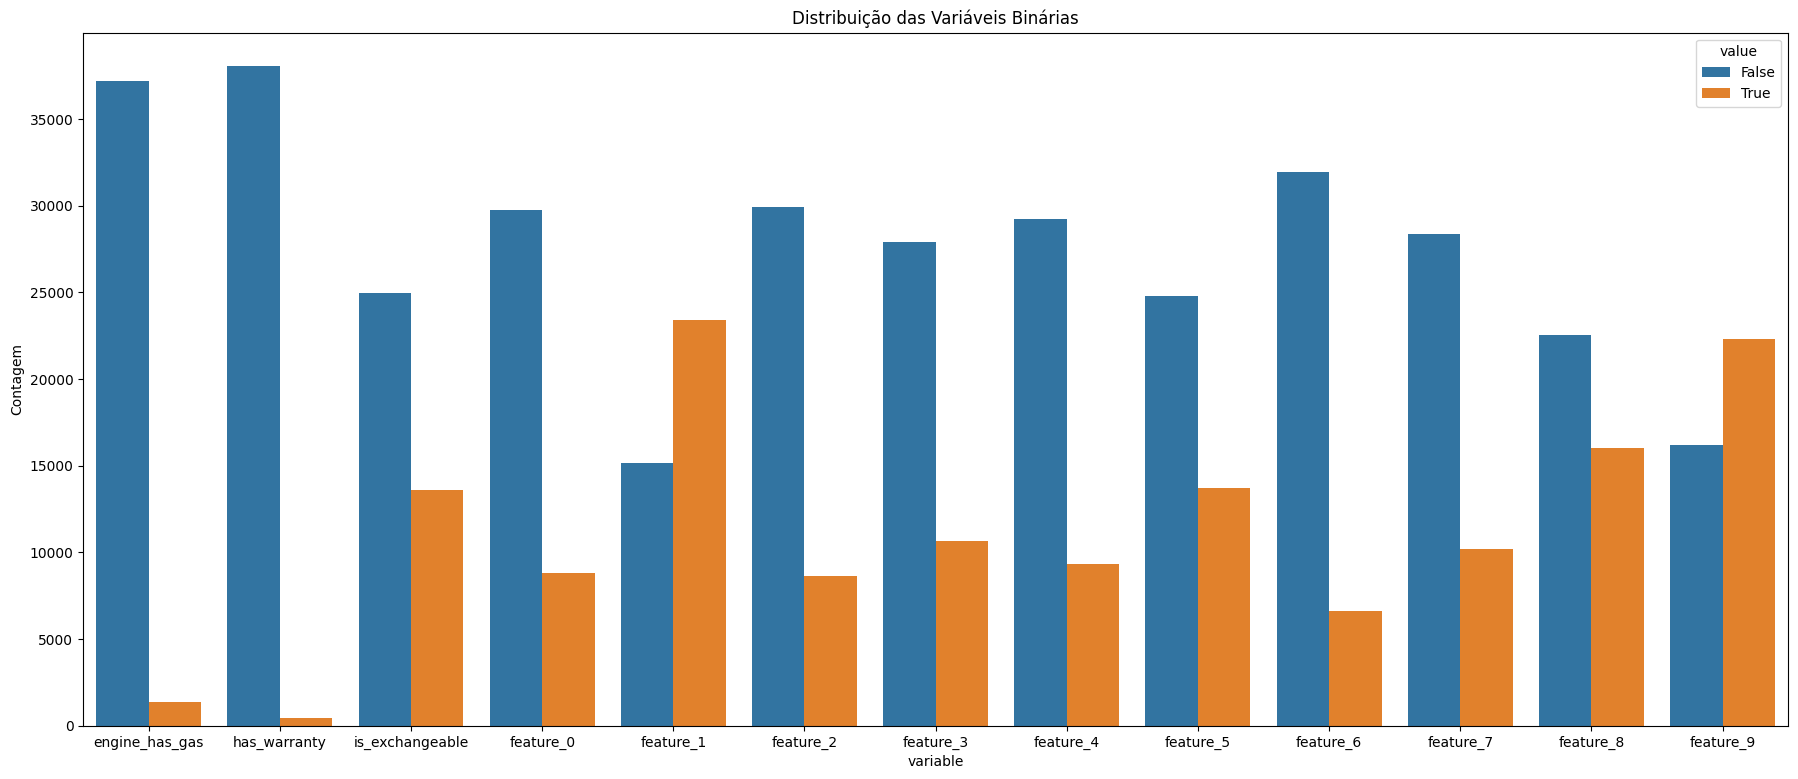

In [9]:
df_melted = bool_columns.melt(var_name="variable", value_name="value")
plt.figure(figsize=(22, 9))
sns.countplot(data=df_melted, x="variable", hue="value")
plt.title("Distribuição das Variáveis Binárias")
plt.ylabel("Contagem")
plt.show()

### 1.7. Comente a respeito do que foi encontrado nessa etapa do trabalho. 

Existe algum dado que aparente ter inconsistências ou problemas? Discorra a respeito.

# 2 - Limpeza e separação dos dados

Nessa etapa, será realizada a limpeza dos dados conforme pontos
observados na seção 1 e também o conjunto de dados será dividido entre
treinamento, validação e teste.

1. Retire as linhas referentes aos dados duplicados
2. Selecione somente a parte do dataset onde o estado do carro (state) é
usado (owned)
3. Selecione somente a parte do dataset onde o odômetro
(odometer_value) é menor que 999.999
4. Selecione somente a parte do dataset onde o preço (price_usd) é
maior ou igual a 100
5. Crie duas novas colunas booleanas a partir das colunas transmission e
engine_type:
a. Crie uma coluna que será verdadeira se a transmissão for
automática e falsa se não for (is_transmission_automatic)
b. Crie uma coluna que será verdadeira se a engine_type for
diesel e falsa se não for (is_engine_type_diesel)
6. Remova as instâncias referentes a modelos de carros raros, quando o
modelo de carro aparece menos de 15 vezes no dataset
7. Remova as colunas state, transmission, engine_type, duration_listed e
number_of_photos
Nesse momento você deve estar com 34.247 linhas e 27 colunas, confira
para observar se não cometeu nenhum erro
(Split)
8. Divisão estratificada entre train_val e teste
a. Crie uma variável auxiliar (price_cat) utilizando a estratificação
quantizada com 10 quantis a partir do preço (price_usd)
b. Utilize essa função para dividir o conjunto de dados de forma
estratificada, separe 20% para teste e 80% para treinamento e
validação (train_val) e com o random_state igual a 42
9. Divisão estratificada entre treinamento e validação
a. Crie uma nova variável auxiliar (train_val_price_cat) para fazer
uma nova estratificação quantizada, mas desta vez no train_val
ao invés do dataset completo
b. Utilize essa nova variável para dividir o train_val entre
treinamento (75%) e validação (25%)
As variáveis auxiliares price_cat e train_val_price_cat são somente para a
divisão dos datasets e não devem ser adicionadas aos conjuntos de dados
utilizados pelos modelos.
10. Separe esses conjuntos entre X_train, y_train, X_val, y_val e X_test e
y_test
11. Confira o shape apresentado para cada um deles está coerente com o
esperado (60% train, 20% val, 20% test)

### 2.1. Remover linhas duplicadas:

In [10]:
df_cleaned = df.drop_duplicates()
df_cleaned

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### 2.2. Filtrar por _state_ "owned":

<Axes: ylabel='state'>

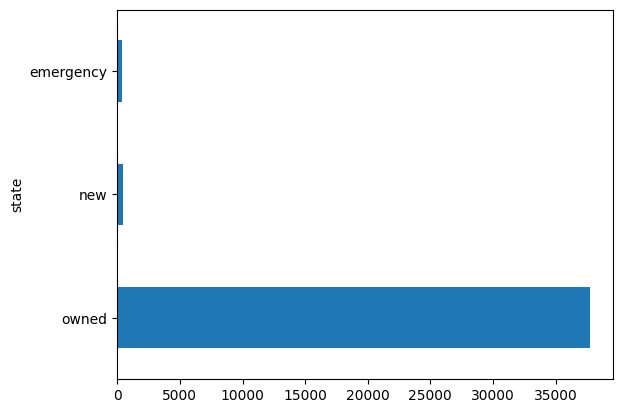

In [11]:
df['state'].value_counts().plot(kind="barh")

In [12]:
df_cleaned = df_cleaned[df_cleaned['state'] == 'owned']
df_cleaned

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### 2.3. Filtrar por _odometer_value_ (< 999.999):

In [13]:
df_cleaned = df_cleaned[df_cleaned['odometer_value'] < 999999]
df_cleaned

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### 2.4. Filtrar por _price_usd_ (>= 100):

In [14]:
df_cleaned = df_cleaned[df_cleaned['price_usd'] >= 100]
df_cleaned

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### 2.5. Criar novas colunas _is_transmission_automatic_ e _is_engine_type_diesel_:

In [15]:
df_cleaned['is_transmission_automatic'] = df_cleaned['transmission'] == 'automatic'
df_cleaned

/tmp/ipykernel_1489476/3153496121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_transmission_automatic'] = df_cleaned['transmission'] == 'automatic'


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,is_transmission_automatic
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,False,True,False,True,True,True,16,True
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,False,True,True,False,False,False,True,83,True
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,False,True,True,151,True
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,86,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,True,True,False,False,False,False,True,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,False,False,True,True,False,False,True,True,301,True
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,False,False,True,True,False,False,True,True,317,False
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,False,False,True,True,False,False,True,True,369,True
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,True,490,False


In [16]:
df_cleaned['is_engine_type_diesel'] = df_cleaned['engine_type'] == 'diesel'
df_cleaned

/tmp/ipykernel_1489476/3192355428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_engine_type_diesel'] = df_cleaned['engine_type'] == 'diesel'


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,is_transmission_automatic,is_engine_type_diesel
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,False,True,False,True,True,True,16,True,False
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,True,True,False,False,False,True,83,True,False
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,True,True,151,True,False
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,86,False,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,True,7,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,False,True,True,False,False,True,True,301,True,False
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,False,True,True,False,False,True,True,317,False,True
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,False,True,True,False,False,True,True,369,True,False
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,True,490,False,False


### 2.6. Remover modelos raros

In [17]:
model_counts = df_cleaned['model_name'].value_counts()
df_cleaned = df_cleaned[df_cleaned['model_name'].isin(model_counts[model_counts >= 15].index)]
df_cleaned

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,is_transmission_automatic,is_engine_type_diesel
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,False,True,False,True,True,True,16,True,False
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,True,True,False,False,False,True,83,True,False
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,True,True,151,True,False
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,86,False,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,True,7,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,False,True,True,False,False,True,True,301,True,False
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,False,True,True,False,False,True,True,317,False,True
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,False,True,True,False,False,True,True,369,True,False
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,True,490,False,False


### 2.7. Remover colunas desnecessárias

In [18]:
df_cleaned = df_cleaned.drop(columns=['state', 'transmission', 'engine_type', 'duration_listed', 'number_of_photos'])
df_cleaned

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,is_transmission_automatic,is_engine_type_diesel
0,Subaru,Outback,silver,190000,2010,gasoline,False,2.5,universal,False,...,True,True,False,True,False,True,True,True,True,False
1,Subaru,Outback,blue,290000,2002,gasoline,False,3.0,universal,False,...,False,False,True,True,False,False,False,True,True,False
2,Subaru,Forester,red,402000,2001,gasoline,False,2.5,suv,False,...,False,False,False,False,False,False,True,True,True,False
3,Subaru,Impreza,blue,10000,1999,gasoline,False,3.0,sedan,False,...,False,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,black,280000,2001,gasoline,False,2.5,universal,False,...,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,silver,290000,2000,gasoline,False,3.5,sedan,False,...,False,False,True,True,False,False,True,True,True,False
38527,Chrysler,PT Cruiser,blue,321000,2004,diesel,False,2.2,hatchback,False,...,False,False,True,True,False,False,True,True,False,True
38528,Chrysler,300,blue,777957,2000,gasoline,False,3.5,sedan,False,...,False,False,True,True,False,False,True,True,True,False
38529,Chrysler,PT Cruiser,black,20000,2001,gasoline,False,2.0,minivan,False,...,False,False,False,False,False,False,False,True,False,False


### 2.8. Divisão estratificada entre treinamento e teste:

price_cat
8    0.098549
5    0.100651
3    0.101352
2    0.094227
9    0.099863
4    0.097760
6    0.100067
7    0.099629
0    0.108068
1    0.099834
Name: proportion, dtype: float64

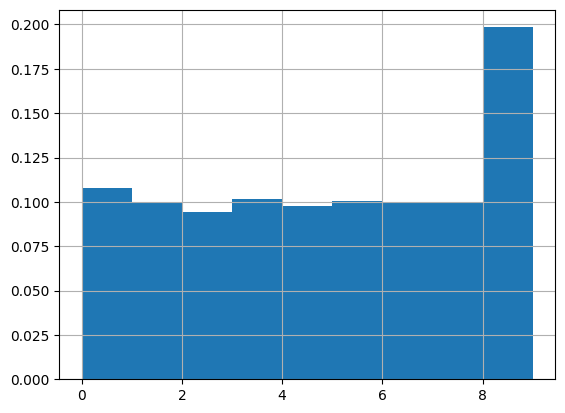

In [19]:
df_cleaned['price_cat'] = pd.qcut(df_cleaned['price_usd'], 10, labels=False)
df_cleaned['price_cat'].hist(bins=range(10), density=True);
df_cleaned['price_cat'].value_counts(sort=False, normalize=True)

In [20]:
X = df_cleaned.drop(["price_usd", "price_cat"], axis=1)
y = df_cleaned["price_usd"]
strat_col = df_cleaned["price_cat"]

X_train_val, X_test, y_train_val, y_test, strat_train_val, strat_test = train_test_split(
    X, y, strat_col, test_size=0.2, random_state=42, stratify=strat_col
)

### 2.9.Divisão estratificada entre treinamento e validação

In [21]:
train_val_price_cat = pd.qcut(y_train_val, q=10, labels=False, duplicates='drop')

In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=train_val_price_cat
)

### 2.10. Separar entre X_train, y_train, X_val, y_val e X_test e y_test

In [23]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (20547, 26), y_train: (20547,)
X_val: (6850, 26), y_val: (6850,)
X_test: (6850, 26), y_test: (6850,)


In [24]:
print(f"Percentage of train: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0] + X_val.shape[0])} %")
print(f"Percentage of test: {X_test.shape[0] / (X_train.shape[0] + X_test.shape[0] + X_val.shape[0])} %")
print(f"Percentage of val: {X_val.shape[0] / (X_train.shape[0] + X_test.shape[0] + X_val.shape[0])} %")

Percentage of train: 0.5999649604344907 %
Percentage of test: 0.2000175197827547 %
Percentage of val: 0.2000175197827547 %


# 3 - EDA de treinamento
Nessa etapa serão observadas correlações entre os atributos e a variável alvo.

## Atividades

Somente utilize o conjunto de treinamento nesta etapa, não o conjunto completo.

1. Variáveis numéricas (int e float): Observe a correlação de Pearson
    1. Calcule a correlação a partir do conjunto de treinamento
    2. Plote esses resultados em um gráfico de barras
    3. Repita as letras a. e b., calculando a correlação com o logaritmo do preço, ao invés do preço em si e comente sobre os resultados encontrados
2. Variáveis booleanas (binárias): Para cada variável booleana, trace um gráfico da distribuição das classes e outro cruzando seus valores com os da variável alvo. Uma sugestão seria um gráfico de barras horizontais para a distribuição e o sns.catplot para o cruzamento com o preço.
3. Variáveis categóricas (não-binárias): Para cada variável categórica, repita os mesmos passos do item anterior. Fique à vontade para limitar o número de categorias quando for muito elevado, selecionando as que são mais frequentes.

### 3.1. Correlação de Pearson para variáveis numéricas

#### 3.1.1. Correlação de Pearson a partir do conjunto de treinamento:

In [25]:
numeric_columns_train = X_train.select_dtypes(include=["int64", "float64"])

correlation_matrix = numeric_columns_train.assign(price_usd=y_train).corr()
correlation_with_price = correlation_matrix['price_usd'].drop('price_usd')

print(correlation_with_price)

odometer_value    -0.406331
year_produced      0.722702
engine_capacity    0.313850
up_counter         0.053981
Name: price_usd, dtype: float64


#### 3.1.2. Plot:

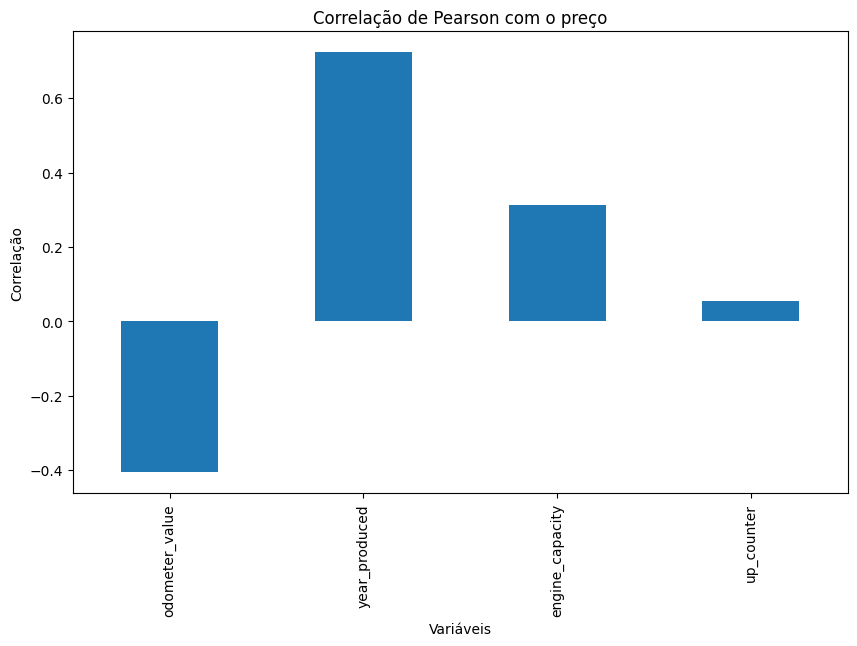

In [26]:
correlation_with_price.plot(kind='bar', figsize=(10, 6))
plt.title('Correlação de Pearson com o preço')
plt.xlabel('Variáveis')
plt.ylabel('Correlação')
plt.show()

#### 3.1.3. Repetir para o logaritmo do preço:

odometer_value    -0.362891
year_produced      0.821970
engine_capacity    0.295864
up_counter         0.050826
Name: log_price_usd, dtype: float64


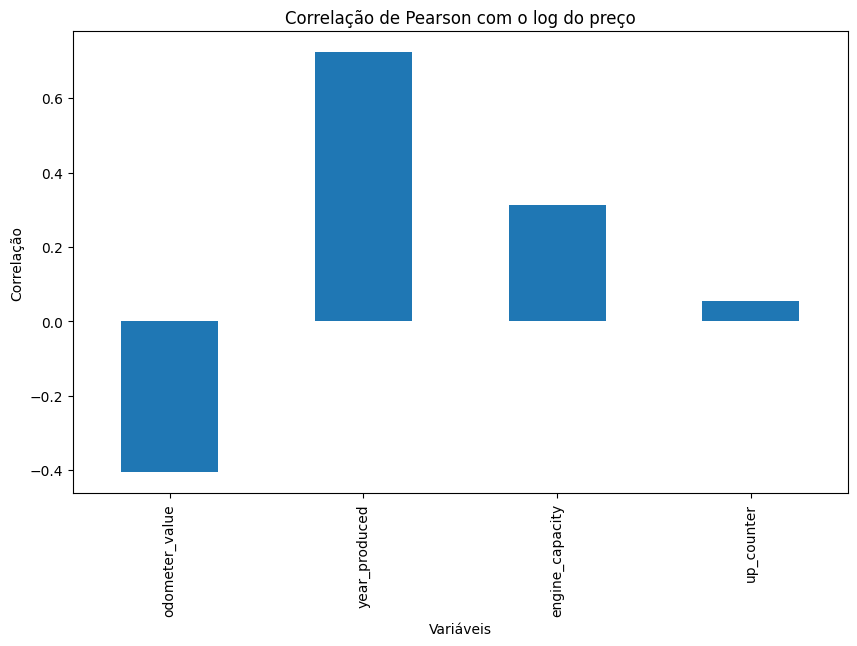

In [27]:
log_price_usd = np.log1p(y_train)
correlation_matrix_log = numeric_columns_train.assign(log_price_usd=log_price_usd).corr()
correlation_with_log_price = correlation_matrix_log['log_price_usd'].drop('log_price_usd')

print(correlation_with_log_price)

correlation_with_price.plot(kind='bar', figsize=(10, 6))
plt.title('Correlação de Pearson com o log do preço')
plt.xlabel('Variáveis')
plt.ylabel('Correlação')
plt.show()

#### 3.1.4. Comparação lado a lado:

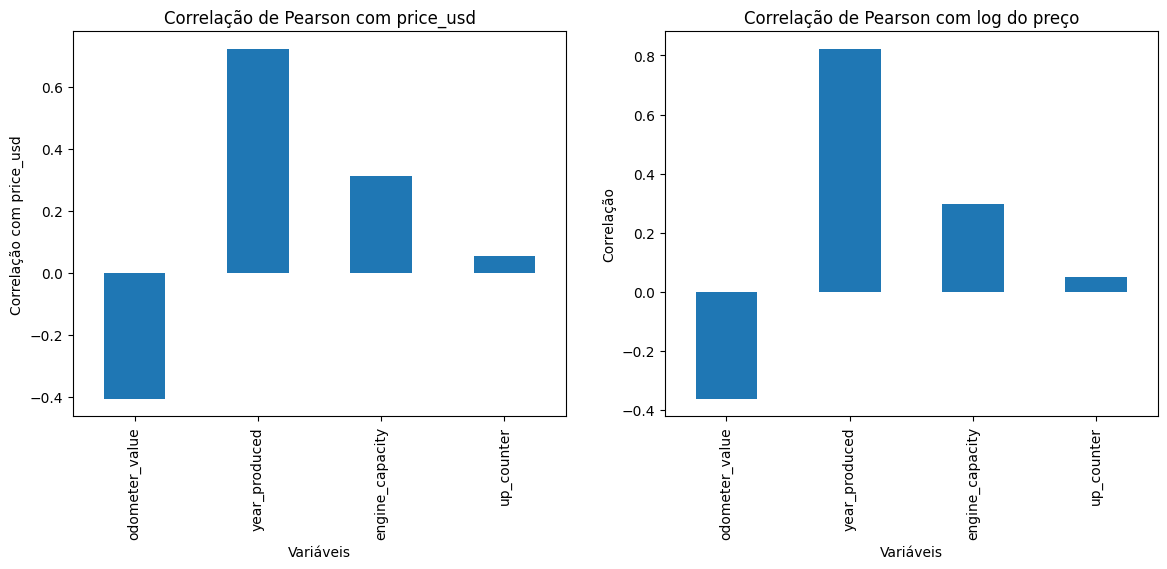

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

correlation_with_price.plot(kind='bar', ax=axes[0])
axes[0].set_title('Correlação de Pearson com price_usd')
axes[0].set_xlabel('Variáveis')
axes[0].set_ylabel('Correlação com price_usd')

correlation_with_log_price.plot(kind='bar', ax=axes[1])
axes[1].set_title('Correlação de Pearson com log do preço')
axes[1].set_xlabel('Variáveis')
axes[1].set_ylabel('Correlação')

plt.show()

### 3.2. Análise de variáveis booleanas:

In [29]:
bool_columns_train = X_train.select_dtypes(include=["bool"])

correlation_matrix = bool_columns_train.assign(price_usd=y_train).corr()
correlation_with_price = correlation_matrix['price_usd'].drop('price_usd')

print(correlation_with_price)
print()

log_price_usd = np.log1p(y_train)
correlation_matrix_log = bool_columns_train.assign(log_price_usd=log_price_usd).corr()
correlation_with_log_price = correlation_matrix_log['log_price_usd'].drop('log_price_usd')

print(correlation_with_log_price)

engine_has_gas              -0.067582
has_warranty                 0.084228
is_exchangeable             -0.051932
feature_0                   -0.297304
feature_1                    0.316467
feature_2                    0.369634
feature_3                    0.522116
feature_4                    0.370207
feature_5                    0.486990
feature_6                    0.485419
feature_7                    0.544868
feature_8                    0.505915
feature_9                    0.323539
is_transmission_automatic    0.473932
is_engine_type_diesel        0.123181
Name: price_usd, dtype: float64

engine_has_gas              -0.064375
has_warranty                 0.056028
is_exchangeable             -0.069426
feature_0                   -0.442110
feature_1                    0.463141
feature_2                    0.340952
feature_3                    0.508822
feature_4                    0.354942
feature_5                    0.517550
feature_6                    0.430092
feature_7        

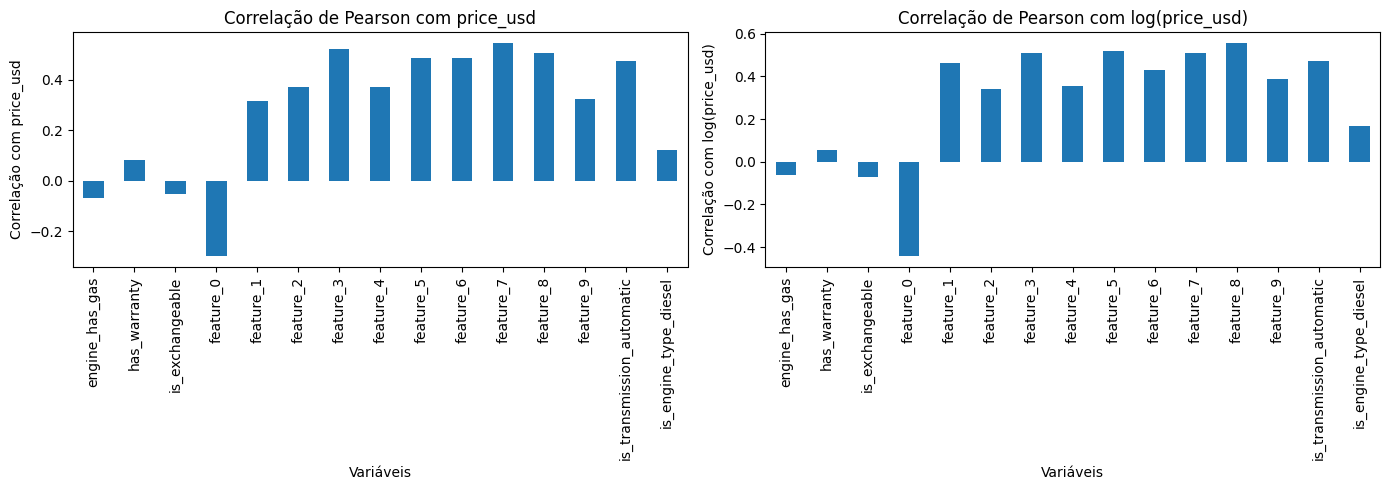

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

correlation_with_price.plot(kind='bar', ax=axes[0])
axes[0].set_title('Correlação de Pearson com price_usd')
axes[0].set_xlabel('Variáveis')
axes[0].set_ylabel('Correlação com price_usd')

correlation_with_log_price.plot(kind='bar', ax=axes[1])
axes[1].set_title('Correlação de Pearson com log(price_usd)')
axes[1].set_xlabel('Variáveis')
axes[1].set_ylabel('Correlação com log(price_usd)')

plt.tight_layout()
plt.show()

### 3.3. Análise de variáveis Categóricas:

In [31]:
# X_train_with_price = X_train.copy()
# X_train_with_price['price_usd'] = y_train

# for col in bool_columns_train:
#     sns.catplot(x=col, y='price_usd', data=X_train_with_price, kind='box', height=4, aspect=2)
#     plt.title(f'Preço por {col}')
#     plt.show()

# g = sns.FacetGrid(X_train_with_price.melt(id_vars='price_usd', value_vars=bool_columns_train), 
#                   col='variable', col_wrap=3, height=4, aspect=1.5, sharey=False)

# g.map(sns.boxplot, 'value', 'price_usd')

# g.set_titles('{col_name}')
# g.set_axis_labels('Valor', 'Preço USD')

# plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Preço por Variáveis Booleanas')
# # plt.show()

# 4 - Seleção de hiperparâmetros

Nessa etapa serão encontrados os melhores hiperparâmetros para os
modelos testados.

1. Somente com atributos numéricos
    1. Construa uma pipeline que contenha o pré-processamento (nesse caso, somente seleciona os dados numéricos) e também contenha o modelo de Regressão linear. Realize o treinamento e mostre os resultados no conjunto de treinamento e também no conjunto de validação.
    2. Repita **1.**, mas escalonando os dados com o StandardScaler ao invés de não escaloná-los. Teve alguma diferença nos resultados? Explique o porquê. A partir desse momento, não é necessário utilizar o StandardScaler, a não ser nos dados numéricos, após o uso de Polinomial Features.
2. Somente com atributos booleanos: construa uma nova pipeline de pré-processamento que seleciona somente os dados booleanos e repassa esses dados para um modelo de regressão linear. Treine esse novo modelo e observe os resultados.
3. Somente com atributos categóricos: Faça o mesmo que na letra anterior, mas utilizando os dados categóricos ao invés dos binários. Para tal, utilize o OneHotEncoder na pipeline de processamento.
4. Todos os atributos: crie uma pipeline que utilizará todos os dados (numéricos, binários e categóricos). Realize o treinamento e observe os resultados.
5. Polynomial features: Crie uma pipeline que irá aplicar PolynomialFeatures somente nos dados numéricos. Após essa aplicação, faça o escalonamento desses dados utilizando o StandardScaler e junte com o resto dos dados (binários e categóricos).
    1. Primeiramente, realize um treinamento utilizando somente o PolynomialFeatures com a regressão linear (teste ao menos para os valores d=2, 5 e 10). Observe os resultados e comente o que foi obtido.
    2. Repita o treinamento e avaliação, mas dessa vez utilizando o modelo Ridge (fazendo uma busca pelo melhor valor do hiperparâmetro alpha, testando ao menos 3 valores, sendo um deles alpha=1, que é o padrão). O que esses novos resultados demonstram?
6. TTR: Repita o item 4., utilizando o TransformTargetRegressor para
transformar a variável alvo (transformando através de Log e
retornando através da exponenciação).
7. TTR+Poly(+Ridge): Faça o mesmo que no item anterior, mas
utilizando o melhor modelo do item 5. como base.
8. Comente sobre o que foi descoberto nessa etapa da atividade.

### 4.1. Atributos numéricos

In [32]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocess = make_column_transformer(('passthrough', numeric_columns))
model = make_pipeline(preprocess, LinearRegression())

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Treino - RMSE: {rmse_train}, MAPE: {mape_train}")
print(f"Validação - RMSE: {rmse_val}, MAPE: {mape_val}")

Treino - RMSE: 3461.8362383723243, MAPE: 0.7710426785835127
Validação - RMSE: 3397.543659196573, MAPE: 0.7793897022027955


In [33]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocess = make_column_transformer((StandardScaler(), numeric_columns))
model = make_pipeline(preprocess, LinearRegression())

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Treino - RMSE: {rmse_train}, MAPE: {mape_train}")
print(f"Validação - RMSE: {rmse_val}, MAPE: {mape_val}")

Treino - RMSE: 3461.8362383723274, MAPE: 0.771042678583512
Validação - RMSE: 3397.543659196577, MAPE: 0.7793897022027957


### 4.2. Atributos Booleanos

In [34]:
bool_columns = X_train.select_dtypes(include=['bool']).columns

preprocess = make_column_transformer(('passthrough', bool_columns))
model = make_pipeline(preprocess, LinearRegression())
# pipeline = Pipeline(steps=[('preprocess', preprocess), ('regression', LinearRegression())])

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Treino - RMSE: {rmse_train}, MAPE: {mape_train}")
print(f"Validação - RMSE: {rmse_val}, MAPE: {mape_val}")

Treino - RMSE: 4074.969710550772, MAPE: 0.8107900268999333
Validação - RMSE: 4095.0880823859225, MAPE: 0.8286051432243687


### 4.3. Atributos Categóricos

In [35]:
cat_columns = X_train.select_dtypes(include=['object']).columns

preprocess = make_column_transformer((OneHotEncoder(), cat_columns))
model = make_pipeline(preprocess, LinearRegression())
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Treino - RMSE: {rmse_train}, MAPE: {mape_train}")
print(f"Validação - RMSE: {rmse_val}, MAPE: {mape_val}")

Treino - RMSE: 3694.7566698276933, MAPE: 0.7356190210389302
Validação - RMSE: 3722.9214768225675, MAPE: 0.7497740493138462


### 4.4. Todos os Atributos

In [36]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
bool_columns = X_train.select_dtypes(include=['bool']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

preprocess = make_column_transformer(
    ('passthrough', numeric_columns),
    ('passthrough', bool_columns),
    (OneHotEncoder(), cat_columns),
    )

model = make_pipeline(preprocess, LinearRegression())
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Treino - RMSE: {rmse_train}, MAPE: {mape_train}")
print(f"Validação - RMSE: {rmse_val}, MAPE: {mape_val}")

Treino - RMSE: 3101.810338893626, MAPE: 0.643931810578463
Validação - RMSE: 3084.8754020981655, MAPE: 0.6453958742872079


### 4.5. Polynomial Features

In [37]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocess = make_column_transformer(
    ('passthrough', numeric_columns),
    )

for degree in [2, 5, 10]:
    model = make_pipeline(preprocess, PolynomialFeatures(degree), LinearRegression())
    
    model.fit(X_train[numeric_columns], y_train)
    y_train_pred_poly = model.predict(X_train[numeric_columns])
    y_val_pred_poly = model.predict(X_val[numeric_columns])

    rmse_train_poly = root_mean_squared_error(y_train, y_train_pred_poly)
    rmse_val_poly = root_mean_squared_error(y_val, y_val_pred_poly)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    print(f"Treino (Poly degree={degree}) - RMSE: {rmse_train_poly}, MAPE: {mape_train}")
    print(f"Validação (Poly degree={degree}) - RMSE: {rmse_val_poly}, MAPE: {mape_val}\n")

Treino (Poly degree=2) - RMSE: 2700.527273567675, MAPE: 0.643931810578463
Validação (Poly degree=2) - RMSE: 2610.4505448303607, MAPE: 0.6453958742872079

Treino (Poly degree=5) - RMSE: 3618.9410486934758, MAPE: 0.643931810578463
Validação (Poly degree=5) - RMSE: 3519.441378551566, MAPE: 0.6453958742872079

Treino (Poly degree=10) - RMSE: 15102.349396385884, MAPE: 0.643931810578463
Validação (Poly degree=10) - RMSE: 23833.96695503157, MAPE: 0.6453958742872079



In [38]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocess = make_column_transformer(
    ('passthrough', numeric_columns),
    )

for degree in [2, 5, 10]:
    for alpha in [0.01, 1, 100]:
        model = make_pipeline(preprocess, PolynomialFeatures(degree), Ridge(alpha))
        model.fit(X_train[numeric_columns], y_train)

        y_train_pred_poly = model.predict(X_train[numeric_columns])
        y_val_pred_poly = model.predict(X_val[numeric_columns])

        rmse_train_poly = root_mean_squared_error(y_train, y_train_pred_poly)
        rmse_val_poly = root_mean_squared_error(y_val, y_val_pred_poly)
        mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
        mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

        print()
        print(f"Treino (Poly degree={degree}, Ridge alpha={alpha}):")
        print(f"\t\t\tRMSE: {rmse_train_poly}, MAPE: {mape_train}")
        print(f"Validação (Poly degree={degree}, Ridge alpha={alpha}):")
        print(f"\t\t\tRMSE: {rmse_val_poly}, MAPE: {mape_val}\n")


Treino (Poly degree=2, Ridge alpha=0.01):
			RMSE: 2703.707393128262, MAPE: 0.643931810578463
Validação (Poly degree=2, Ridge alpha=0.01):
			RMSE: 2616.906070513964, MAPE: 0.6453958742872079


Treino (Poly degree=2, Ridge alpha=1):
			RMSE: 2857.7673740988994, MAPE: 0.643931810578463
Validação (Poly degree=2, Ridge alpha=1):
			RMSE: 2773.2892068476694, MAPE: 0.6453958742872079



/home/wh0an/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.28787e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/wh0an/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.28787e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/wh0an/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.28787e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Treino (Poly degree=2, Ridge alpha=100):
			RMSE: 3209.601569726908, MAPE: 0.643931810578463
Validação (Poly degree=2, Ridge alpha=100):
			RMSE: 3159.2799536147836, MAPE: 0.6453958742872079


Treino (Poly degree=5, Ridge alpha=0.01):
			RMSE: 19611.306700709072, MAPE: 0.643931810578463
Validação (Poly degree=5, Ridge alpha=0.01):
			RMSE: 18441.519100401358, MAPE: 0.6453958742872079


Treino (Poly degree=5, Ridge alpha=1):
			RMSE: 19611.306700709072, MAPE: 0.643931810578463
Validação (Poly degree=5, Ridge alpha=1):
			RMSE: 18441.519100401358, MAPE: 0.6453958742872079


Treino (Poly degree=5, Ridge alpha=100):
			RMSE: 19611.306700709072, MAPE: 0.643931810578463
Validação (Poly degree=5, Ridge alpha=100):
			RMSE: 18441.519100401358, MAPE: 0.6453958742872079


Treino (Poly degree=10, Ridge alpha=0.01):
			RMSE: 13658.939393321967, MAPE: 0.643931810578463
Validação (Poly degree=10, Ridge alpha=0.01):
			RMSE: 12648.578435605728, MAPE: 0.6453958742872079


Treino (Poly degree=10, Ridg

### 4.6. TTR

In [39]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
bool_columns = X_train.select_dtypes(include=['bool']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

preprocess = make_column_transformer(
    ('passthrough', numeric_columns),
    ('passthrough', bool_columns),
    (OneHotEncoder(), cat_columns),
    )

model = make_pipeline(preprocess, TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp))
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Treino - RMSE: {rmse_train}, MAPE: {mape_train}")
print(f"Validação - RMSE: {rmse_val}, MAPE: {mape_val}")


Treino - RMSE: 2391.7106579518163, MAPE: 0.33632274931887846
Validação - RMSE: 2405.9331326367223, MAPE: 0.3322340965278021


### 4.7. TTR + Poly + (Ridge)

In [40]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
bool_columns = X_train.select_dtypes(include=['bool']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

d = 2
alpha = 1

preprocess = make_column_transformer(
    (make_pipeline(PolynomialFeatures(degree=d, include_bias=False), StandardScaler()), numeric_columns),
    ('passthrough', bool_columns),
    (OneHotEncoder(), cat_columns),
)

model = make_pipeline(
    preprocess, 
    TransformedTargetRegressor(
        regressor=Ridge(alpha=alpha), 
        func=np.log, inverse_func=np.exp
    )
)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Treino - RMSE: {rmse_train:.2f}, MAPE: {mape_train:.1%}")
print(f"Validação - RMSE: {rmse_val:.2f}, MAPE: {mape_val:.1%}")


Treino - RMSE: 1669.60, MAPE: 22.3%
Validação - RMSE: 1709.18, MAPE: 22.6%


### 4.8. Comentários

Pode-se observar como diferentes pré-processamentos e técnicas de modelagem impactam o desempenho dos modelos. A inclusão de PolynomialFeatures pode melhorar a performance em modelos mais complexos, enquanto a regularização Ridge ajuda a controlar o overfitting, especialmente em modelos com muitas interações polinomiais. E, para este problema TTR + Poly + Ridge aparentou ser uma boa modelagem.

# 5 - Retreinamento e resultados no conjunto de teste

Retreinar modelos com os dados de treinamento e validação e os melhores
hiperparâmetros encontrados na seção 4 e observar os resultados no conjunto de
teste.

1. Regressão linear com todos os atributos (item 4.4)
2. Polynomial features (item 4.5)
3. TTR (item 4.6)
4. TTR+Poly(+Ridge) (item 4.7)

In [41]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [42]:
X_train.shape, y_train.shape

((27397, 26), (27397,))

In [43]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
bool_columns = X_train.select_dtypes(include=['bool']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

d = 2
alpha = 1.00

preprocess = make_column_transformer(
    ('passthrough', numeric_columns),
    (OneHotEncoder(), cat_columns),
    (OneHotEncoder(drop='if_binary'), bool_columns),
)

preprocess_drop = make_column_transformer(
    ('passthrough', numeric_columns),
    (OneHotEncoder(drop='first'), cat_columns),
    (OneHotEncoder(drop='if_binary'), bool_columns),
)

models = {
    "LR": make_pipeline(preprocess, LinearRegression()),

    "TTR": make_pipeline(preprocess, TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)),

    "Poly+LR": make_pipeline(
        make_column_transformer(
            (Pipeline(steps=[
                ('poly', PolynomialFeatures(degree=d, include_bias=False)),
                ('scaler', StandardScaler())
            ]), numeric_columns),
            (OneHotEncoder(), cat_columns),
            (OneHotEncoder(drop="if_binary"), bool_columns)
        ),
        LinearRegression()
    ),


    "TTR+Poly+Ridge": make_pipeline(
        make_column_transformer(
            (Pipeline(steps=[
                ('poly', PolynomialFeatures(degree=d, include_bias=False)),
                ('scaler', StandardScaler())
            ]), numeric_columns),
            (OneHotEncoder(), cat_columns),
            (OneHotEncoder(drop="if_binary"), bool_columns)
        ),
        TransformedTargetRegressor(
            Ridge(alpha), func=np.log, inverse_func=np.exp)
    ),
}

# models = {
#     'LR': make_pipeline(preprocess, LinearRegression()),
#     'TTR': make_pipeline(preprocess,
#                          TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)),
#     'Poly-Ridge-TTR': make_pipeline(preprocess, StandardScaler(with_mean=False), PolynomialFeatures(d, include_bias=False),
#                                     TransformedTargetRegressor(Ridge(alpha), func=np.log, inverse_func=np.exp))
#     # 'Poly-LR': make_pipeline(preprocess_drop, PolynomialFeatures(6, include_bias=False), LinearRegression()),
# }

results = pd.DataFrame(
    [], columns=['Train RMSE', 'Train MAPE', 'Test RMSE', 'Test MAPE'])
for name, model in models.items():
    for (X, y, subset) in [(X_train, y_train, 'Train'), (X_test, y_test, 'Test')]:
        if subset == 'Train':
            model.fit(X, y)
        for (metric, abbrev) in [(root_mean_squared_error, 'RMSE'), (mean_absolute_percentage_error, 'MAPE')]:
            results.loc[name, f'{subset} {abbrev}'] = metric(
                y, model.predict(X))
results.style.format({'Train RMSE': '{:.2f}', 'Train MAPE': '{:.1%}',
                      'Test RMSE': '{:.2f}',  'Test MAPE': '{:.1%}'})

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
LR,3097.97,64.0%,3129.77,64.6%
TTR,2398.32,33.6%,2379.82,33.3%
Poly+LR,1882.15,33.8%,1954.52,35.8%
TTR+Poly+Ridge,1664.22,22.3%,1679.54,23.1%


### 5.1. Comentários

O modelo TTR + Poly + Ridge parece fazer uma boa generalização para o nosso problema em questão.

# 6 - Análise de resultados
Observar erros e predições do melhor modelo.
Atividades
Fazer essas análises no conjunto de teste
1. Mostre um scatter plot entre os valores reais e preditos para o melhor
modelo encontrado
2. Mostre a distribuição do erro das predições
3. As suas conclusões mudariam caso a métrica de avaliação
considerada fosse o RMSE ao invés do MAPE? Explique.

In [44]:
model = models["TTR+Poly+Ridge"]

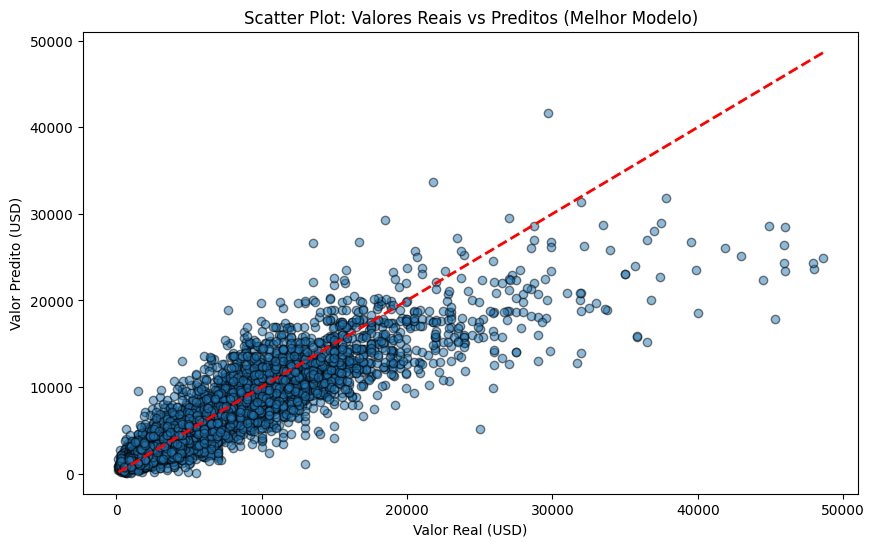

In [45]:
ttr_poly_ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', TransformedTargetRegressor(regressor=Ridge(alpha=1), func=np.log, inverse_func=np.exp))
])

ttr_poly_ridge_pipeline.fit(X_train_val[numeric_columns], y_train_val)

y_test_pred_tpr = ttr_poly_ridge_pipeline.predict(X_test[numeric_columns])
y_test_pred_best = y_test_pred_tpr  # Usando o melhor modelo (TTR+Poly+Ridge)

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred_best, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title("Scatter Plot: Valores Reais vs Preditos (Melhor Modelo)")
plt.xlabel("Valor Real (USD)")
plt.ylabel("Valor Predito (USD)")
plt.show()

Este gráfico permite visualizar como o modelo está se comportando. Idealmente, os pontos devem estar próximos da linha vermelha.

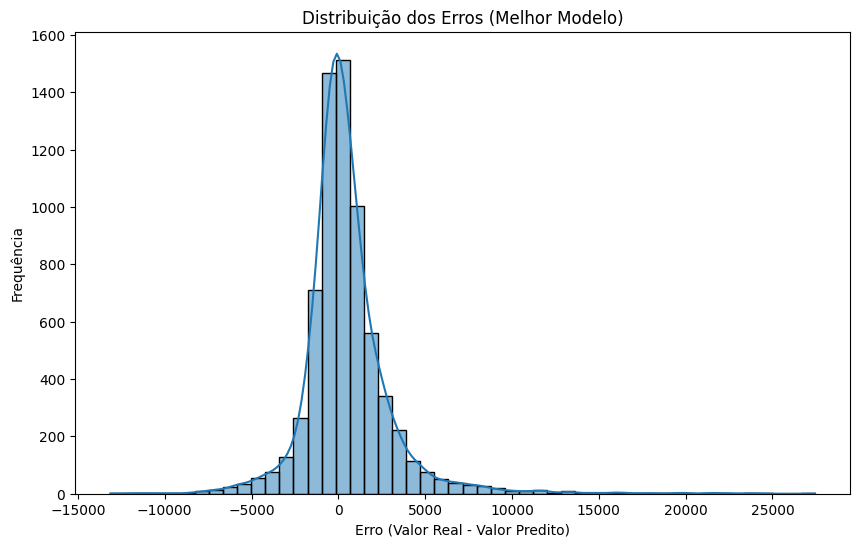

In [46]:
errors = y_test - y_test_pred_best

plt.figure(figsize=(10,6))
sns.histplot(errors, kde=True, bins=50)
plt.title("Distribuição dos Erros (Melhor Modelo)")
plt.xlabel("Erro (Valor Real - Valor Predito)")
plt.ylabel("Frequência")
plt.show()

Já este mostrará a distribuição dos erros. A concentração dos erros em torno de zero indicará que o modelo está fazendo boas predições na maior parte dos casos.

# 7 - Conclusão
Comentários sobre o trabalho.
Atividades
1. Comentários gerais sobre o trabalho e sobre o que você aprendeu ao
realizá-lo
2. Existe algum viés nos dados do dataset, por exemplo, por serem
dados de anúncios de vendas? O que isso poderia influenciar nos
modelos que estão sendo desenvolvidos? E quais limitações isso pode
trazer?
3. Outros comentários relevantes (opcional)


### 7.1.

Durante o projeto, pude "sujar as mãos" e entender o processo de análise de dados para um problema específico, passando por etapas completas de pré-processamento, análise exploratória de dados, construção de modelos preditivos e avaliação dos resultados. 

Foi uma ótima oportunidade para praticar as técnicas vistas em aula.

### 7.2

Os dados analisados são baseados em anúncios de vendas, o que pode introduzir alguns vieses importantes:

- **Seleção de veículos em melhores condições**: É possível que veículos com preços muito baixos ou em más condições sejam sub-representados, uma vez que vendedores geralmente preferem anunciar carros em boas condições.
- **Preços inflacionados ou não representativos**: Os preços dos anúncios podem ser superestimados, uma vez que vendedores podem pedir mais do que o preço de mercado, esperando uma negociação.
- **Localização geográfica**: O dataset pode ser influenciado por veículos de determinadas regiões, o que pode distorcer a distribuição de preços, marcas ou condições dos carro.